**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**

---

# **Clase - Integrales indefinidas en el análisis económico parte 2**


In [589]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### **Ejercicio 1**

En competencia perfecta, el costo marginal de una empresa es $CMg(q) = 20 + 2q$.

- Obtener la función de costo total $C(q)$ mediante integración.

In [590]:
q = sp.symbols("q", positive=True)

In [591]:
F = sp.symbols("F")

In [592]:
CMg = 20 + 2 * q

In [593]:
C = sp.integrate(CMg, q) + F

In [594]:
C

F + q**2 + 20*q

- Suponer que $C(0) = 100$ e identificar el costo fijo.

In [595]:
F_sol = sp.solve(sp.Eq(C.subs(q, 0), 100), F)[0]

In [596]:
print(f"El costo fijo es F = {F_sol}.")

El costo fijo es F = 100.


In [597]:
C = C.subs(F, F_sol)

In [598]:
C

q**2 + 20*q + 100

- Expresar el costo medio $C_{med}(q) = \frac{C(q)}{q}$ y discutir su forma.

In [599]:
CMed = C / q

In [600]:
CMed

(q**2 + 20*q + 100)/q

In [601]:
CMed = sp.simplify(CMed)
CMed

q + 20 + 100/q

Verificamos la forma.

In [602]:
q_grid = np.linspace(0.1, 15, 1000)  # Comenzamos desde 0.1 para evitar división por cero

In [603]:
CMed_f = sp.lambdify(q, CMed)
CMed_num = CMed_f(q_grid)

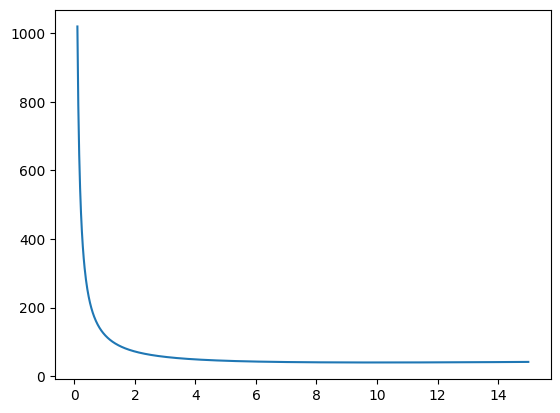

In [604]:
plt.plot(q_grid, CMed_num)

¿Puedo encontrar el mínimo?

In [605]:
dCMed = sp.diff(CMed)
dCMed

1 - 100/q**2

In [606]:
q_min = sp.solve(sp.Eq(dCMed, 0), q)[0]
q_min

10

In [607]:
CMed_min = sp.simplify(CMed.subs(q, q_min))  # => 40
CMed_min

40

(30.0, 75.0)

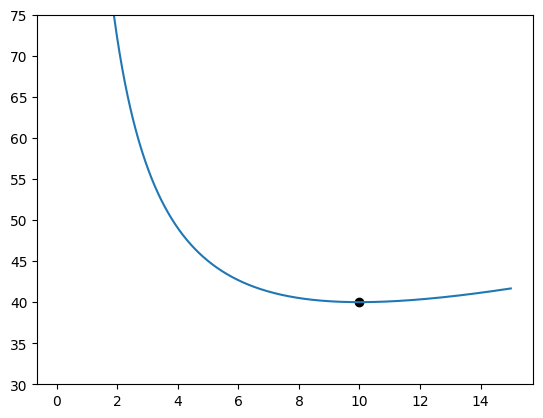

In [608]:
plt.plot(q_grid, CMed_num)
plt.scatter([q_min], [CMed_min], c="black")
plt.ylim(30, 75)

### **Ejercicio 2**

Un monopolista enfrenta la función de ingreso marginal $IMg(q) = 200 - 4q$.

- Integrar para hallar la función de ingreso total $I(q)$.

In [609]:
IMg = 200 - 4 * q

In [610]:
I = sp.integrate(IMg, q)

In [611]:
I

-2*q**2 + 200*q

- Suponer que $I(0)=0$ y graficar $I(q)$ e $IMg(q)$.  

- Identificar el rango de producción donde el ingreso total es creciente.

In [612]:
K = sp.symbols('K')

In [613]:
K_sol = sp.solve(sp.Eq(I.subs(q, 0), 0))
K_sol

[]

Definimos algunos puntos clave.

In [614]:
q_opt = sp.solve(sp.Eq(IMg, 0), q)[0]
q_opt

50

In [615]:
I_max = sp.simplify(I.subs(q, q_opt))
I_max

5000

Graficamos.

In [616]:
q_grid = np.linspace(0, 60, 400)

In [617]:
I_num   = sp.lambdify(q, I)(q_grid)
IMg_num = sp.lambdify(q, IMg)(q_grid)

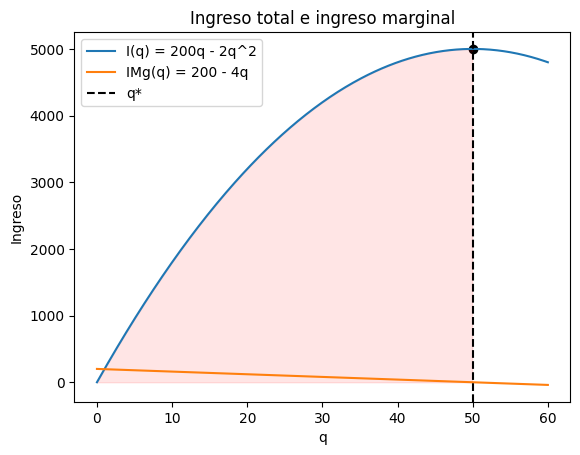

In [618]:
plt.figure()
plt.plot(q_grid, I_num, label="I(q) = 200q - 2q^2")
plt.plot(q_grid, IMg_num, label="IMg(q) = 200 - 4q")
plt.scatter([q_opt], [I_max], c="black")
plt.axvline(q_opt, linestyle="--", c="black", label=f"q*")
plt.fill_between(q_grid, 0, I_num, where=(q_grid<q_opt), alpha=0.1, color="red")
plt.title("Ingreso total e ingreso marginal")
plt.xlabel("q")
plt.ylabel("Ingreso")
plt.legend()
plt.show()

### **Ejercicio 3**

Una empresa con costos marginales crecientes $CMg(q)=10 + q^2$ produce en un mercado de competencia perfecta con precio $p=70$.

- Hallar las funciones $C(q)$ e $I(q)$ mediante integración.

In [619]:
q = sp.symbols("q", nonnegative=True)
CF = sp.symbols("CF", nonnegative=True)

In [620]:
p = 70

In [621]:
CMg = 10 + q**2

In [622]:
C = sp.integrate(CMg, q) + F
C

F + q**3/3 + 10*q

Por competencia perfecta:

In [623]:
IMg = p

In [624]:
I = sp.integrate(IMg, q)

In [625]:
I

70*q

- Definir el beneficio total $B(q) = I(q) - C(q)$.

In [626]:
B = sp.simplify(I - C)
B

-F - q**3/3 + 60*q

- Identificar el nivel de producción que maximiza $B(q)$.

In [627]:
dB = sp.diff(B, q)
dB

60 - q**2

In [628]:
q_opt = sp.solve(sp.Eq(dB, 0), q)[0]
q_opt

2*sqrt(15)

Pruebo concavidad.

In [629]:
d2B = sp.diff(B, q, 2)
d2B

-2*q

In [630]:
concavidad_en_q_opt = d2B.subs(q, q_opt) # Evaluar q en q_opt

In [631]:
concavidad_en_q_opt

-4*sqrt(15)

Computo el beneficio óptimo.

In [632]:
B_opt = sp.simplify(B.subs(q, q_opt))
B_opt

-F + 80*sqrt(15)

In [633]:
C, I, B, q_opt, B.subs({q: q_opt,
                        F: 0})

(F + q**3/3 + 10*q, 70*q, -F - q**3/3 + 60*q, 2*sqrt(15), 80*sqrt(15))

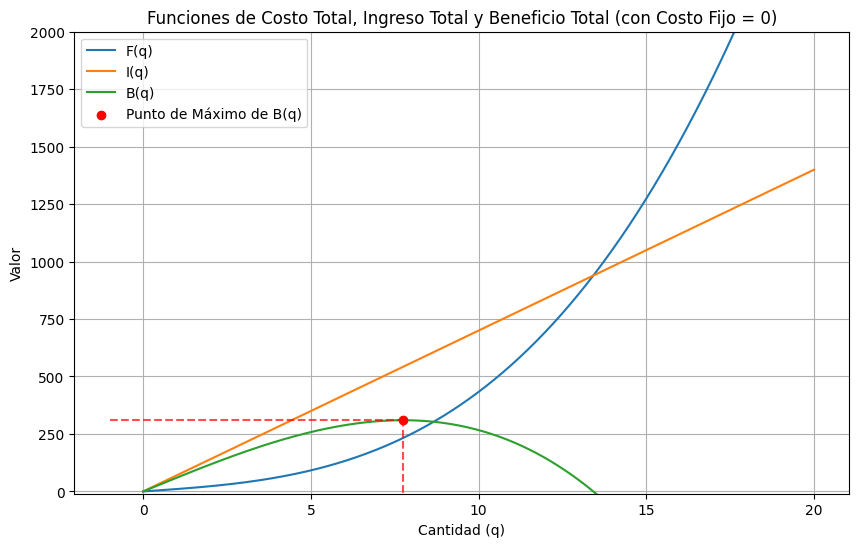

In [634]:
# Visualizar las funciones de Costo Total, Ingreso Total y Beneficio Total
q_grid_ejercicio_3 = np.linspace(0, 20, 400) # Ajusta el rango de q según sea necesario

# Convertir las expresiones simbólicas a funciones numéricas
C_num_ejercicio_3 = sp.lambdify(q, C.subs(F, 0)) # Sustituimos F=0 para graficar un caso particular
I_num_ejercicio_3 = sp.lambdify(q, I)
B_num_ejercicio_3 = sp.lambdify(q, B.subs(F, 0)) # Sustituimos F=0 para graficar un caso particular

C_vals_ejercicio_3 = C_num_ejercicio_3(q_grid_ejercicio_3)
I_vals_ejercicio_3 = I_num_ejercicio_3(q_grid_ejercicio_3)
B_vals_ejercicio_3 = B_num_ejercicio_3(q_grid_ejercicio_3)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(q_grid_ejercicio_3, C_vals_ejercicio_3, label="F(q)")
ax.plot(q_grid_ejercicio_3, I_vals_ejercicio_3, label="I(q)")
ax.plot(q_grid_ejercicio_3, B_vals_ejercicio_3, label="B(q)", color="tab:green")

# Marcar el punto de beneficio máximo (si F=0)
# q_opt ya fue calculado como 2*sqrt(15)
B_opt_ejercicio_3 = B.subs({q: q_opt, F: 0})

ax.scatter(float(q_opt), float(B_opt_ejercicio_3), color="red", zorder=5, label="Punto de Máximo de B(q)")
ax.vlines(x=float(q_opt), ymin=ax.get_ylim()[0], ymax=float(B_opt_ejercicio_3), color='red', linestyle='--', alpha=0.7)
ax.hlines(y=float(B_opt_ejercicio_3), xmin=ax.get_xlim()[0], xmax=float(q_opt), color='red', linestyle='--', alpha=0.7)


ax.set_title("Funciones de Costo Total, Ingreso Total y Beneficio Total (con Costo Fijo = 0)")
ax.set_xlabel("Cantidad (q)")
ax.set_ylabel("Valor")
ax.legend()
ax.grid(True)
plt.ylim(-10, 2000) # Ajusta los límites del eje y si es necesario
plt.show()

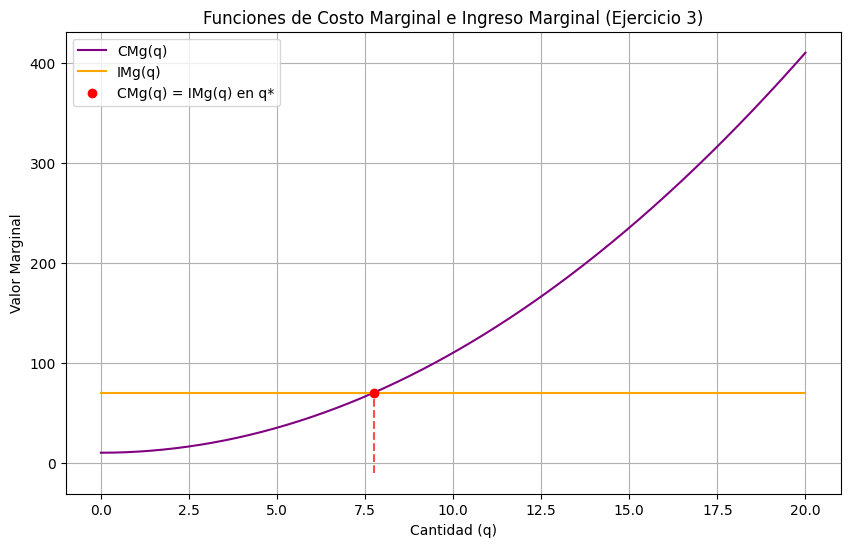

In [635]:
# Visualizamos las funciones marginales del Ejercicio 3
q_grid_ejercicio_3 = np.linspace(0, 20, 400) # Ajusta el rango de q según sea necesario

# Convertir las expresiones simbólicas a funciones numéricas
CMg_num_ejercicio_3 = sp.lambdify(q, CMg)
IMg_num_ejercicio_3 = sp.lambdify(q, IMg)

CMg_vals_ejercicio_3 = CMg_num_ejercicio_3(q_grid_ejercicio_3)

IMg_vals_ejercicio_3 = np.full_like(q_grid_ejercicio_3, IMg_num_ejercicio_3(q_grid_ejercicio_3[0]))


fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(q_grid_ejercicio_3, CMg_vals_ejercicio_3, label="CMg(q)", color="purple")
ax.plot(q_grid_ejercicio_3, IMg_vals_ejercicio_3, label="IMg(q)", color="orange")

# Marcar el punto donde CMg = IMg (cantidad óptima)
# q_opt ya fue calculado como 2*sqrt(15)
ax.scatter(float(q_opt), float(CMg.subs(q, q_opt)), color="red", zorder=5, label="CMg(q) = IMg(q) en q*")
ax.vlines(x=float(q_opt), ymin=ax.get_ylim()[0], ymax=float(CMg.subs(q, q_opt)), color='red', linestyle='--', alpha=0.7)


ax.set_title("Funciones de Costo Marginal e Ingreso Marginal (Ejercicio 3)")
ax.set_xlabel("Cantidad (q)")
ax.set_ylabel("Valor Marginal")
ax.legend()
ax.grid(True)
# Ajusta los límites del eje y si es necesario para que se vea bien el cruce
# ax.set_ylim(0, 100)
plt.show()

### **Ejercicio 4**

En un duopolio tipo Cournot, el ingreso marginal de la firma 1 es $IMg_1(q_1) = 180 - 6 \cdot q_1 - 2 \cdot q_2$.  

- Integrar respecto de $q_1$ para obtener el ingreso total $I_1(q_1, q_2)$.

In [636]:
q1, q2 = sp.symbols('q1 q2', real=True)

In [637]:
IMg1 = 180 - 6*q1 - 2*q2

In [638]:
I1 = sp.integrate(IMg1, q1)

In [639]:
I1

-3*q1**2 + q1*(180 - 2*q2)

In [640]:
I1 = sp.simplify(I1)
I1

q1*(-3*q1 - 2*q2 + 180)

- Suponer que $I_1(0,q_2)=0$.

Forzamos que, si $q_{1} = 0$, entonces $I(0) = 0$, independientemente de $q_{2}$.

In [641]:
I1_ = sp.simplify(I1.subs(q1, q1) - I1.subs(q1, 0))

¿Cambia algo?

In [642]:
I1 == I1_

True

No.

- Discutir cómo incide $q_2$ en la pendiente de la función de ingreso total.

---



La pendiente de $I_{1}$ con respecto a $q_{1}$ es precisamente el ingreso marginal: $\frac{\partial I_1}{\partial q_1} = IMg_1 = 180 - 6q_1 - 2q_2$.

Un aumento de $q_2$ la reduce en 2 unidades por cada unidad de $q_2$, para todo nivel de $q_1$.

Geométricamente, $q_2$ baja el intercepto inicial de la pendiente: $$\left.\frac{\partial I_1}{\partial q_1}\right|_{q_1=0} = 180 - 2q_2$$

### **Ejercicio 5**

El costo marginal de una firma de transporte depende de la distancia $x$ como $C^{\prime} (x)=15 + 0.1 \cdot x^2$.  

- Integrar para hallar el costo total $C(x)$.

In [643]:
x = sp.symbols("x")

In [644]:
T = sp.symbols("T")

In [645]:
CMg = 15 + 0.1 * x**2

In [646]:
C = sp.integrate(CMg, x) + T

In [647]:
C

T + 0.0333333333333333*x**3 + 15.0*x

- Suponer que $C(0)=300$.  

In [648]:
T_val = sp.solve(sp.Eq(C.subs(x, 0), 300), T)[0]

In [649]:
T_val

300

In [650]:
C = C.subs(T, T_val)
C

0.0333333333333333*x**3 + 15.0*x + 300

Interpretación económica:
- $15$  -> costo marginal base por unidad de distancia
- $ 0.1 \cdot x^2 $ -> costo marginal creciente con la distancia (efectos no lineales)
- $300$ -> costo fijo inicial, independiente de la distancia



---
### **Ejercicio 6**

Una empresa tiene $IMg(q)=250-10 \cdot q$ y $CMg(q)=50+2 \cdot q$.

- Hallar $I(q)$, $C(q)$ y $B(q)$ mediante integración.


In [651]:
q = sp.symbols('q', nonnegative=True)
F = sp.symbols('F', real=True)

In [652]:
IMg = 250 - 10*q
CMg = 50 + 2*q

In [653]:
I = sp.integrate(IMg, q)
I

-5*q**2 + 250*q

In [654]:
C = sp.integrate(CMg, q) + F
C

F + q**2 + 50*q

In [655]:
B = I - C
B

-F - 6*q**2 + 200*q

- Determinar simbólicamente el punto en que $IMg=CMg$.

In [656]:
q_opt = sp.solve(sp.Eq(IMg, CMg), q)[0]
q_opt

50/3

- Evaluar $B(q)$ en dicho punto e interpretar su significado.

In [657]:
B_opt = sp.simplify(B.subs(q, q_opt))
B_opt

5000/3 - F

Interpretaciones:
- El cruce $IMg = CMg$ entrega el nivel de producción que maximiza el beneficio cuando precio e ingreso marginal son decrecientes lineales y el costo marginal es creciente lineal.
- El beneficio máximo depende negativamente del costo fijo



---
### **Ejercicio 7**

Obtener la función de utilidad total $U(q)$ a partir de la función marginal $UMg(q) = 50 - 2 \cdot q$. Interpretar brevemente el punto donde $UMg(q)=0$.


In [658]:
q = sp.symbols('q', real=True)

In [659]:
UMg = 50 - 2*q

In [660]:
U = sp.integrate(UMg, q)

In [661]:
q_opt = sp.solve(sp.Eq(UMg, 0), q)[0]

In [662]:
U, UMg, q_opt, U.subs(q, q_opt)

(-q**2 + 50*q, 50 - 2*q, 25, 625)

In [663]:
U_num = sp.lambdify(q, U)(q_grid)
UMg_num = sp.lambdify(q, UMg)(q_grid)

(-50.0, 686.25)

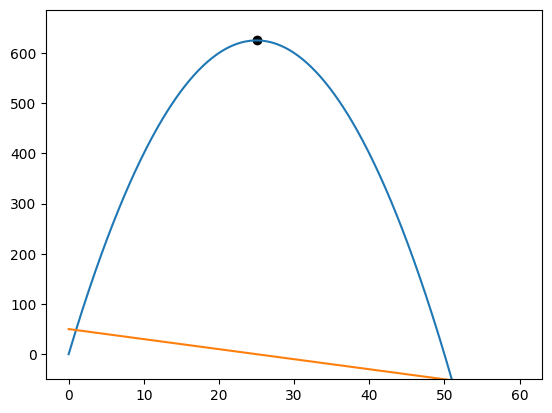

In [664]:
plt.plot(q_grid, U_num)
plt.plot(q_grid, UMg_num)
plt.scatter([q_opt], [U.subs(q, q_opt)], c="black")
plt.ylim(-50, None)




---



**Problema:**

Supongamos que la función de costo marginal de una empresa está dada por:

$$ CMg(q) = 25 - 16\cdot q + 3\cdot q^2  $$

donde $q$ es la cantidad producida.

y que el costo fijo es de $0.

**Puntos a resolver:**

1.  **Recuperar la función de costo total (C(q))**
2.  **Calcular el costo medio (C(q)/q)**
3.  **Calcular EL Costo medio mínimo**
4.  **Visualizar las funciones e interpretar**

In [665]:
q = sp.symbols("q", positive=True)

In [666]:
F = sp.symbols("F")

In [667]:
CMg = 25 - 16 * q + 3 * q**2

In [668]:
C = sp.integrate(CMg, q) + F
C

F + q**3 - 8*q**2 + 25*q

In [669]:
F_sol = sp.solve(sp.Eq(C.subs(q, 0), 0), F)[0]

In [670]:
C = C.subs(F, F_sol)
C

q**3 - 8*q**2 + 25*q

In [671]:
CMed = C / q
CMed

(q**3 - 8*q**2 + 25*q)/q

In [672]:
CMed = sp.simplify(CMed)
CMed

q**2 - 8*q + 25

In [673]:
dCMed = sp.diff(CMed)
dCMed

2*q - 8

In [674]:
q_min = sp.solve(sp.Eq(dCMed,0), q)[0]

q_min

4

In [675]:
CMed_min = sp.simplify(CMed.subs(q, q_min))
CMed_min

9

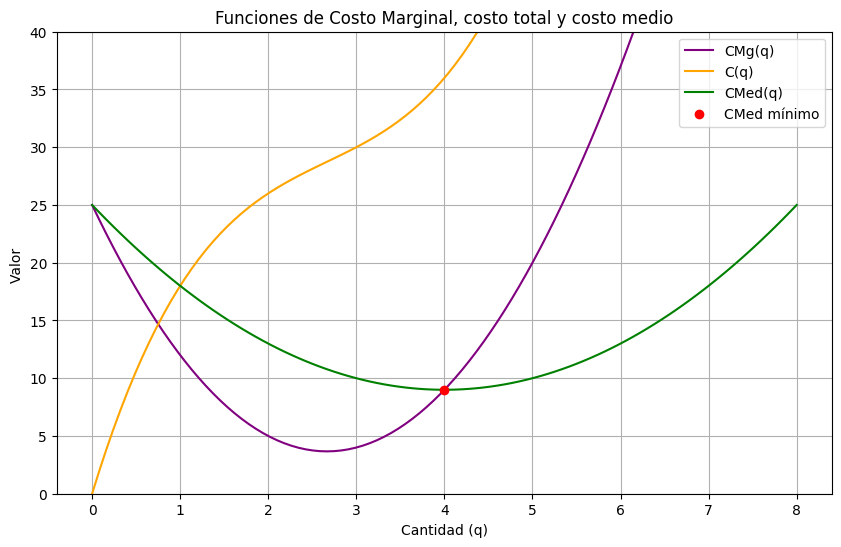

In [676]:
# Visualizamos las funciones
q_grid= np.linspace(0, 8, 100)

# Convertir las expresiones simbólicas a funciones numéricas
C_num = sp.lambdify(q, C)
CMg_num= sp.lambdify(q, CMg)
CMed_num = sp.lambdify(q, CMed)
CMg_vals= CMg_num(q_grid)
CMed_vals = CMed_num(q_grid)
C_vals = C_num(q_grid)


fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(q_grid, CMg_vals, label="CMg(q)", color="purple")
ax.plot(q_grid, C_vals, label="C(q)", color="orange")
ax.plot(q_grid, CMed_vals, label="CMed(q)", color="green")

# Marcar el punto del CMed mínimo

ax.scatter(q_min, CMed_min.subs(q, q_min), color="red", zorder=5, label="CMed mínimo")

ax.set_title("Funciones de Costo Marginal, costo total y costo medio")
ax.set_xlabel("Cantidad (q)")
ax.set_ylabel("Valor ")
ax.legend()
ax.grid(True)
ax.set_ylim(0, 40)
plt.show()